
# Telecom Churn Model

In this notebook we are going to build a predictive classification model for prediction customer churn using Telecom data.

**Data Science Cycle:**

    Data Understanding
        0. Exploratory Data Analysis
        
    Data Preparation
        1. Target Definition
        2. Feature Engineering
        3. Data Splitting
    
    Modeling
        4. Variable Selection
        5. Model Selection
        6. Fine-tuning

    Evaluation
        7. Evaluation & Interpretation

# Set Up
Import required libraries

In [1]:
# Data Manipulation & analysis
import pandas as pd
import numpy as np
from scipy import stats

# Visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

# Modeling
!pip install boruta
from boruta import BorutaPy 

from sklearn.feature_selection import RFE, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
import xgboost as xgb

# Evaluation
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# Other Set Up
from datetime import datetime
import os
import warnings
from pprint import pprint

In [2]:
# Set timer 
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [3]:
# Set style for displaying data
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Set style for plotting
sns.set_style("whitegrid")

In [4]:
np.random.seed(42)

---
# **__ITERATION 1__**

# Exploratory Data Analysis

In [10]:
# os.path.abspath(os.getcwd())

# # Read data
data = pd.read_csv('Telecom_customer churn.csv')

# # Count rows & columns
print(data.shape)

(100000, 100)


In [11]:
# Check with features have missing values
missing = data.columns[data.isnull().any()]
# Impute those with their respective median
data[missing] = data[missing].fillna(value=data[missing].median())

In [37]:
# Get first rows
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [13]:
# Get last rows 
data.tail()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
99995,48.195,355.5,44.99,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,-0.315,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,0.0,45.333333,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,94.866667,0.000000,2.016667,2.666667,1.680000,0.000000,0.000000,20.666667,0.000000,23.566667,0.000000,26.666667,0.0,73.316667,0.0,2.000000,54.666667,45.333333,0.0,0.0,1,25,1,1,U,B,N,3771,9534.0,1594.83,1561.14,9494.0,3751,74.34,452.10,178.62,410,121,73,603.0,159.0,100.0,U,LOS ANGELES AREA,N,N,29.98999,1.0,1.0,WC,0.0,0.0,O,15.0,S,M,5.0,M,4.0,2.0,NaN,A,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,48.195,355.5,44.99,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,-0.315,3.000000,0.0,1.000000,0.0,12.333333,0.0,69.333333,0.000000,15.333333,0.0,53.333333,0.000000,0.000000,0.000000,0.000000,9.000000,0.333333,100.760000,0.000000,21.413333,6.666667,14.893333,0.000000,0.000000,60.333333,0.000000,121.790000,0.000000,1.000000,0.0,0.383333,0.0,4.000000,69.333333,53.333333,0.0,0.0,0,27,1,1,U,CY,Y,3675,8887.0,1517.10,1451.85,8805.0,3629,72.59,440.25,181.45,382,126,73,410.0,143.0,69.0,S,LOS ANGELES AREA,N,N,29.98999,1.0,1.0,WC,0.0,0.0,O,9.0,S,M,3.0,M,7.0,2.0,I,A,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,48.195,355.5,44.99,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,-0.315,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,31,1,1,U,DA,N,1271,9336.0,1114.91,1055.93,9234.0,1238,55.58,486.00,65.16,662,85,61,712.0,88.0,72.0,U,SOUTHWEST AREA,Y,N,199.98999,2.0,2.0,WCMB,0.0,0.0,NaN,5.0,NaN,B,1.0,M,9.0,1.0,NaN,NaN,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,48.195,355.5,44.99,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,-0.315,18.666667,0.0,0.666667,0.0,117.333333,0.0,550.666667,0.333333,327.000000,0.0,417.000000,0.333333,1.333333,1.333333,0.106667,235.333333,1.000000,564.233333,1.656667,330.890000,55.000000,62.896667,16.666667,32.883333,442.333333,0.333333,641.230000,1.656667,167.333333,0.0,253.893333,0.0,19.333333,551.000000,417.333333,0.0,0.0,0,25,1,1,U,EA,N,10082,20784.0,2669.20,2593.26,20488.0,9921,123.49,975.62,472.43,1031,450,148,943.0,433.0,165.0,U,SOUTHWEST AREA,Y,N,149.98999,7.0,5.0,WCMB,0.0,0.0,NaN,5.0,NaN,U,2.0,NaN,6.0,1.0,NaN,NaN,0.0,S,U,U,U,U,U,N,75.0,1099999
99999,48.195,355.5,44.99,0.2475,2.75,1.0,0.6825,0.0,0.0,-6.25,-0.315,5.666667,0.0,0.666667,0.0,19.333333,0.0,155.666667,0.000000,1.333333,0.0,130.000000,0.000000,0.666667,0.666667,0.183333,1.333333,3.666667,164.436667,0.000000,0.000000,4.666667,7.110000,0.000000,0.000000,99.000000,0.000000,133.690000,0.000000,32.333333,0.0,30.746667,0.0,6.333333,155.666667,130.000000,0.0,0.0,1,25,1,1,U,B,N,1303,2355.0,956.47,885.94,2225.0,1231,46.63,117.11,64.79,105,60,51,111.0,64.0,51.0,S,LOS ANGELES AREA,Y,N,149.98999,3.0,2.0,WCMB,0.0,0.0,NaN,2.0,S,A,2.0,M,4.0

In [8]:
# Descriptive Statistics
data.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,99109.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,97161.000000,97161.000000,97161.000000,99153.000000,99999.000000,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,-1.021067,5.955085,0.040520,4.022917,0.025777,27.784905,0.029810,144.881677,0.870548,55.085152,0.047590,108.892535,0.774442,1.790838,4.666880,3.683328,29.766550,0.284720,227.763520,1.844036,111.654562,24.753320,28.467865,7.894360,18.193037,88.480285,0.358162,174.080788,0.707832,66.003498,0.416283,165.280703,1.135804,10.044298,145.752225,109.666977,0.011700,1.782928,0.495620,18.833990,1.548140,1.358960,2877.141930,7648.363833,1031.924988,960.111529,7546.314699,2836.366920,57.913832,483.726493,173.554507,519.641210,180.337320,59.193330,509.634576,178.365157,58.683618,101.875763,1.787118,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,50.363209,8.954715,0.877136,10.672202,1.490255,38.358734,0.496970,158.267711,9.053901,86.841198,2.127422,118.580079,8.129844,5.315570,12.761953,10.539981,55.833753,1.092101,264.403894,23.733226,162.691285,34.414822,48.962903,16.145590,41.421462,103.066103,4.065630,207.673553,8.410151,91.456885,4.652627,237.332918,17.768683,15.418406,159.348094,119.594305,0.547470,5.353953,0.499983,9.655794,1.075255,0.655555,3790.863474,8666.558293,852.907511,840.170815,8594.889729,3756.513882,36.161292,438.485213,167.824576,533.634073,192.725835,46.695429,496.663453,182.724565,40.758577,61.005671,1.313977,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0AEDE8508>,
      dtype=object)

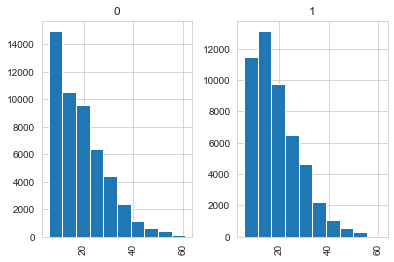

In [9]:
# Check for example, difference in tenure (months) between churners and non-churners
data['months'].hist(by=data.churn)

# Data Preparation

### Target Definition
    - Target: Churn behavior: Which customers had a phone plan active in the Independent Period, but became inactive (unsubscribed) in the dependent Period?
    - Subject: NA because anonymous data
    - Granularity: Customers
    - Time Window: Predictors are calculated over a three-month period*, and churn is measured on the fifth.

### Feature Engineering

Create new variables, handle categorical data, impute missing values, etc.

***Tweak/create new variables***

In [38]:
# Hide warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace kid0-10 columns with preteen 
preteen = data[["kid0_2",
                "kid3_5",
                "kid6_10"]].apply(lambda x: "Y" if (x.iloc[0] == "Y" or x.iloc[1] == "Y" or x.iloc[2] == "Y") else "N",axis=1)
data["preteen"] = preteen
data.drop(["kid0_2","kid3_5","kid6_10"], axis=1, inplace=True)

# Replace kid11-17 columns with teen 
teen = data[["kid11_15","kid16_17"]].apply(lambda x: "Y" if (x.iloc[0] == "Y" or x.iloc[1] == "Y") else "N",axis=1)
data["teen"] = teen
data.drop(["kid11_15","kid16_17"], axis=1, inplace=True)

In [39]:
# Create new variables
data["CDR_data"] = data["drop_dat_Mean"]/data["plcd_dat_Mean"]
data["CSSR_data"] = data["comp_dat_Mean"]/data["plcd_dat_Mean"]
data["CSSR_voice"] = data["comp_vce_Mean"]/data["plcd_vce_Mean"]
data["CSSR"] = data["complete_Mean"]/data["attempt_Mean"]

***Handle categorical variables***

In [46]:
# Let's check all non-numeric fields.
data.columns[data.dtypes.values == "object"]

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'creditcd', 'preteen', 'teen'], dtype='object')

In [43]:
# Save all nominal categorical variables
categ_nominal = ['new_cell', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic','preteen','teen','creditcd']

# Save all ordinal ordered categorical variables
categ_ordinal_ordered = ['crclscod'] #Credit class code

In [14]:
# Check nominal categorical summaries
data[categ_nominal].describe()

,new_cell,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,marital,infobase,HHstatin,dwllsize,ethnic,preteen,teen,creditcd
count,100000,100000,92612,99960,99999,99999,89811,66294,68091,98268,77921,62077,61692,98268,100000,100000,98268
unique,3,2,5,19,4,2,3,2,2,5,2,6,15,17,2,2,2
top,U,N,S,NEW YORK CITY AREA,Y,N,WCMB,O,S,U,M,C,A,N,N,N,Y
freq,66914,86064,32097,11098,72265,85593,75733,64284,48759,37333,77697,39124,47205,33389,86993,85251,67234


In [15]:
# Check nominal categorical summaries
data[categ_ordinal_ordered].describe()

,crclscod
count,100000
unique,54
top,AA
freq,36509


All these categorical variables contain string, we need to convert those.

In [44]:
# Let's one-hot encode all (takes about 1 minute)
for i in categ_nominal:
    data = pd.concat([data,
                      pd.get_dummies(data[i],
                                     prefix=i,
                                     dummy_na=True)],
                     sort=False,
                     axis=1)
    
print(data.shape) 

(100000, 211)


In [45]:
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,creditcd,eqpdays,Customer_ID,preteen,teen,CDR_data,CSSR_data,CSSR_voice,CSSR,new_cell_N,new_cell_U,new_cell_Y,new_cell_nan,asl_flag_N,asl_flag_Y,asl_flag_nan,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_nan,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,area_nan,dualband_N,dualband_T,dualband_U,dualband_Y,dualband_nan,refurb_new_N,refurb_new_R,refurb_new_nan,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,hnd_webcap_nan,ownrent_O,ownrent_R,ownrent_nan,dwlltype_M,dwlltype_S,dwlltype_nan,marital_A,marital_B,marital_M,marital_S,marital_U,marital_nan,infobase_M,infobase_N,infobase_nan,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,HHstatin_nan,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_nan,ethnic_B,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,ethnic_nan,preteen_N,preteen_Y,preteen_nan,teen_N,teen_Y,teen_nan,creditcd_N,creditcd_Y,creditcd_nan
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,Y,361.0,1000001,N,N,NaN,NaN,0.859873,0.859873,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,Y,240.0,1000002,N,N,NaN,NaN,0.734177,0.734177,1,0,0,0,1,0,0,0,0,0,0,1,0,0

In [17]:
# Remove the categorical variables
data = data.drop(categ_nominal,
                  axis=1)
print(data.shape)

(100000, 194)


In [18]:
# Order this as alphabet sort and then assign numbers instead
for i in categ_ordinal_ordered:
    s_a = sorted(data[i].unique())
    s_a_dict = {i:x for x,i in enumerate(s_a)}
    data[i] = data[i].map(s_a_dict)

In [19]:
# Now we have all numerical values, let's check for missing values and rare dummy variables
# We can check missing values under "count" in the descritpive statistics overview
# We will take this in excel 
data.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,crclscod,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID,CDR_data,CSSR_data,CSSR_voice,CSSR,new_cell_N,new_cell_U,new_cell_Y,new_cell_nan,asl_flag_N,asl_flag_Y,asl_flag_nan,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_nan,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,area_nan,dualband_N,dualband_T,dualband_U,dualband_Y,dualband_nan,refurb_new_N,refurb_new_R,refurb_new_nan,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,hnd_webcap_nan,ownrent_O,ownrent_R,ownrent_nan,dwlltype_M,dwlltype_S,dwlltype_nan,marital_A,marital_B,marital_M,marital_S,marital_U,marital_nan,infobase_M,infobase_N,infobase_nan,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,HHstatin_nan,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_nan,ethnic_B,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,ethnic_nan,preteen_N,preteen_Y,preteen_nan,teen_N,teen_Y,teen_nan,creditcd_N,creditcd_Y,creditcd_nan
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,99109.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,97161.000000,97161.000000,97161.000000,99153.000000,99999.000000,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05,14980.000000,14980.000000,91831.000000,91840.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.

***Remove Variables***

In [20]:
# Remove all variables based on above analyis (see excel): that have either too many missing values, or are too rare, or is not relevant (e.g. customer id)
toremove = ['new_cell_nan','asl_flag_nan','preteen_nan','teen_nan','Customer_ID','dualband_nan','refurb_new_nan','area_nan','ethnic_X','ethnic_M','dualband_U','infobase_N','hnd_webcap_UNKW','ethnic_C','dwllsize_I','dwllsize_H','dwllsize_G','dwllsize_M','dwllsize_F','ethnic_P','dwllsize_L','dwllsize_E','dwllsize_K','dwllsize_D','ethnic_D','HHstatin_H','dwllsize_N','ethnic_R','dwllsize_O','ethnic_B','dwllsize_J','dwllsize_C','marital_nan','ethnic_nan','creditcd_nan','HHstatin_G','ownrent_R','ethnic_F','area_PHILADELPHIA AREA','area_TENNESSEE AREA','ethnic_J','HHstatin_B','area_SOUTH FLORIDA AREA','ethnic_I','ethnic_O','area_CENTRAL/SOUTH TEXAS AREA','dualband_T','area_NORTHWEST/ROCKY MOUNTAIN AREA','area_HOUSTON AREA','area_NORTH FLORIDA AREA','ethnic_Z','area_OHIO AREA','area_GREAT LAKES AREA','HHstatin_A','prizm_social_one_R','CDR_data','CSSR_data','numbcars','lor','income','adults']

# Remove
data = data.drop(toremove,axis=1)
print(data.shape)

(100000, 133)


***Handle Missing Values***

In [21]:
# Replace all other missing values with the median 
data = data.fillna(value=data.median())

***Seperate X from Y***

In [22]:
# Set target
target=['churn']

# Set X and Y (features and target)
x = data[data.columns.difference(target)]
y = data[target]

***Scaling***

In [23]:
# Scale
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Transform back to Dataframe with column names
x = pd.DataFrame(x)
x.columns = list(data[data.columns.difference(target)])

### Data Splitting

In [24]:
# Split data 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 132)
(20000, 132)
(80000, 1)
(20000, 1)


# Modeling

### Variable Selection

***Random Forest Feature Importance***

In [25]:
# Run Random Forest with 1000 trees, max 10 features per tree
start_time = timer()
RF_model = RandomForestClassifier(n_estimators = 500, max_features = 10, verbose=1).fit(x_train, y_train.values.ravel())
timer(start_time) 

# Takes 8-10 minutes

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



 Time taken: 0 hours 7 minutes and 9.32 seconds.


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.1min finished


In [26]:
# Print Feature Importance
feature_imp = pd.Series(RF_model.feature_importances_,index=list(x_train)).sort_values(ascending=False)
feature_imp

eqpdays                           0.032343
change_mou                        0.024382
months                            0.023960
mou_Mean                          0.019855
change_rev                        0.019756
adjrev                            0.019661
totrev                            0.019471
avgrev                            0.019425
avgqty                            0.019343
avgmou                            0.018998
rev_Mean                          0.018287
totcalls                          0.018152
adjqty                            0.018125
totmou                            0.017974
adjmou                            0.017900
avg3mou                           0.017654
avg6mou                           0.017013
mou_cvce_Mean                     0.016835
mou_peav_Mean                     0.016735
mou_opkv_Mean                     0.016566
avg3qty                           0.016530
CSSR                              0.016420
CSSR_voice                        0.016400
avg6qty    

***Recursive Feature Elimination with Logistic Regression***

In [27]:
# Create Logistic Regression model
logreg_model = LogisticRegression()

In [28]:
# Getting 30 selected features
sel_f = RFE(logreg_model,30)

In [29]:
# Hide warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Fitting the model
start_time = timer()
sel_f = sel_f.fit(x_train, y_train.values.ravel())
timer(start_time) 

# Takes 10-15 minutes


 Time taken: 0 hours 14 minutes and 31.46 seconds.


In [30]:
# List of the selected features
selected_feat = x_train.columns[sel_f.get_support()]
selected_feat

Index(['adjrev', 'avg3mou', 'avg6qty', 'avgmou', 'ccrndmou_Mean', 'change_mou', 'change_rev', 'custcare_Mean', 'drop_blk_Mean', 'drop_vce_Mean', 'eqpdays', 'hnd_price', 'iwylis_vce_Mean', 'models', 'months', 'mou_Mean', 'mou_peav_Mean', 'mouowylisv_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'peak_vce_Mean', 'phones', 'rev_Mean', 'roam_Mean', 'threeway_Mean', 'totmou', 'totmrc_Mean', 'uniqsubs', 'vceovr_Mean'], dtype='object')

***Boruta Feature Selection***


In [31]:
# Fit Random Forest Regressor
rf = RandomForestClassifier(n_jobs=-1)

#so Boruta runs, transform df to np arrayss
y2=np.ravel(y_train) #for the warning to be sorted
y2
x2=np.array(x_train)
x2

# Run boruta
start_time = timer() #start
boruta_feature_selector = BorutaPy(rf, n_estimators=30, verbose=2, random_state=42, max_iter = 30, perc = 90)
boruta_feature_selector.fit(x2, y2)
timer(start_time) #end

# Takes 3 minutes

Iteration: 	1 / 30
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	2 / 30
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	3 / 30
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	4 / 30
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	5 / 30
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	6 / 30
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	7 / 30
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	8 / 30
Confirmed: 	0
Tentative: 	18
Rejected: 	114
Iteration: 	9 / 30
Confirmed: 	5
Tentative: 	13
Rejected: 	114
Iteration: 	10 / 30
Confirmed: 	5
Tentative: 	13
Rejected: 	114
Iteration: 	11 / 30
Confirmed: 	5
Tentative: 	13
Rejected: 	114
Iteration: 	12 / 30
Confirmed: 	5
Tentative: 	11
Rejected: 	116
Iteration: 	13 / 30
Confirmed: 	5
Tentative: 	11
Rejected: 	116
Iteration: 	14 / 30
Confirmed: 	5
Tentative: 	11
Rejected: 	116
Iteration: 	15 / 30
Confirmed: 	5
Tentative: 	11
Rejected: 	116
Iteration: 	16 / 30
Confirmed: 	5
Tentative: 	9
Rejected

In [32]:
# Show which features have been selected
features = [f for f in x_train.columns]
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
list(final_features)

['change_mou', 'change_rev', 'eqpdays', 'months', 'mou_Mean', 'rev_Mean']

***Step Forward Feature Selection (SFS)***

In [ ]:
# Because computationally expensive, will run it on our best candidates so far and extract the best 10 features only
candidatefeatures = ['eqpdays','change_mou','months','mou_Mean','adjrev','change_rev','totrev','avgrev','avgqty','avgmou','rev_Mean','totcalls','adjqty','totmou','avg3mou','adjmou','CSSR_voice','avg6mou','mou_cvce_Mean','avg3qty','mou_peav_Mean','avg6qty','mouowylisv_Mean','totmrc_Mean','mou_rvce_Mean','peak_vce_Mean','opk_vce_Mean','avg3rev','drop_blk_Mean','drop_vce_Mean','ovrrev_Mean','ovrmou_Mean','iwylis_vce_Mean','hnd_price','vceovr_Mean','blck_vce_Mean','ccrndmou_Mean','custcare_Mean','uniqsubs','models','mou_pead_Mean']

# Lets get the best 10 features 
start_time = timer() #start
sfs_model = SFS(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1),
         k_features = 10,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'precision',
          cv = 4,
          n_jobs= -1
         ).fit(x_train[candidatefeatures], y_train.values.ravel())
timer(start_time) #end

# Takes 1 hour

In [ ]:
# Get selected features
sfs_model.k_feature_names_

***Correlation Matrix***

(19.0, 0.0)

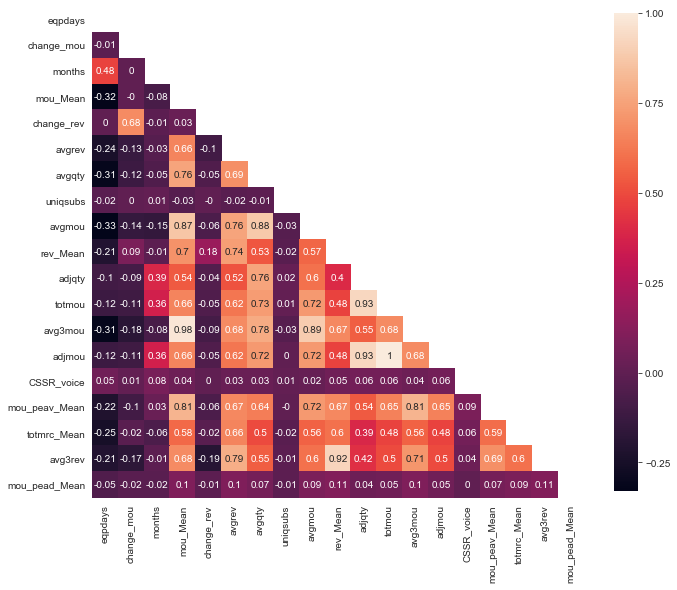

In [35]:
# Based on the different methods, these 18 are the top features so far
topfeatures = ['eqpdays','change_mou','months','mou_Mean','change_rev','avgrev','avgqty','uniqsubs','avgmou','rev_Mean','adjqty','totmou','avg3mou','adjmou','CSSR_voice','mou_peav_Mean','totmrc_Mean','avg3rev','mou_pead_Mean']

# Lets get their correlations 
# Compute correlation matrix
corr = x_train[topfeatures].corr().round(2)

# Set figure options
fig,  ax = plt.subplots(figsize=(11,11),nrows=1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate heatmap including mask, and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True,annot=True, cbar_kws={"shrink": .8})

# Fix axis
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Some are too highly correlated, lets reconsider them.


In [36]:
# Overwrite our current data with selected features
finalfeatures = ['eqpdays','change_mou','months','change_rev','avgrev','avgqty','uniqsubs','avgmou','rev_Mean','adjqty','totmou','CSSR_voice','mou_peav_Mean','totmrc_Mean','drop_vce_Mean','blck_vce_Mean','mou_pead_Mean']
x_train_final = x_train[finalfeatures]
x_test_final = x_test[finalfeatures]

## Modeling

***Evaluation Metrics***

We will use the following evaluation metrics:
        - AUC
        - Accuracy
        - Precision
        - Recall

In [37]:
# Define Scoring metrics
scoring = ['roc_auc', 'accuracy','precision', 'recall']

### Model Selection

        -Logistic Regression
        -Random Forest
        -XGBoost

***Logistic Regression***

In [38]:
# Logistic Regression
LogR_model = LogisticRegression()

# Score
LogR_scores = cross_validate(LogR_model, x_train_final, y_train.values.ravel(), cv=5, scoring=scoring)

# Store Results
LogR_AUC = (LogR_scores['test_roc_auc']).mean().round(3)
LogR_Acc = (LogR_scores['test_accuracy']).mean().round(3)
LogR_Prec = (LogR_scores['test_precision']).mean().round(3)
LogR_Rec = (LogR_scores['test_recall']).mean().round(3)

***Random Forest***

In [39]:
# Random Forest Classifier
RF_model = RandomForestClassifier()

# Score
start_time = timer() #start
RF_scores= cross_validate(RF_model, x_train_final, y_train.values.ravel(), cv=5, scoring=scoring)
timer(start_time) #end

# Store Results
RF_AUC = (RF_scores['test_roc_auc']).mean().round(3)
RF_Acc = (RF_scores['test_accuracy']).mean().round(3)
RF_Prec = (RF_scores['test_precision']).mean().round(3)
RF_Rec = (RF_scores['test_recall']).mean().round(3)

# can also add parameter n_estimators = 100, 500 or 1000 e.g. RandomForestClassifier(n_estimators = 1000)
# 1000 trees will take about 22 minutes


 Time taken: 0 hours 0 minutes and 22.69 seconds.


***XG Boost***

In [40]:
# XG Regressor
XGB_model = xgb.XGBClassifier()

# Score
start_time = timer() #start
XGB_scores = cross_validate(XGB_model, x_train_final, y_train.values.ravel(), cv=5, scoring=scoring)
timer(start_time) #end

# Store Results
XGB_AUC = (XGB_scores['test_roc_auc']).mean().round(3)
XGB_Acc = (XGB_scores['test_accuracy']).mean().round(3)
XGB_Prec = (XGB_scores['test_precision']).mean().round(3)
XGB_Rec = (XGB_scores['test_recall']).mean().round(3)

# takes 30 seconds


 Time taken: 0 hours 0 minutes and 42.99 seconds.


***Compare Models & Select best model(s) so far***

In [41]:
# Check model outputs so far
models = [('Logistic Regression (train)', LogR_AUC, LogR_Acc, LogR_Prec, LogR_Rec),   
          ('Random Forest (train)', RF_AUC, RF_Acc, RF_Prec, RF_Rec),   
          ('XG Boost (train)', XGB_AUC, XGB_Acc, XGB_Prec, XGB_Rec)
        ]

result = pd.DataFrame(data = models, columns=['Model', 'AUC', 'Accuracy','Precision', 'Recall'])
result

,Model,AUC,Accuracy,Precision,Recall
0,Logistic Regression (train),0.591,0.565,0.566,0.519
1,Random Forest (train),0.610,0.577,0.588,0.482
2,XG Boost (train),0.659,0.613,0.606,0.622


### Fine-tuning

Let's fine-tune both RF and XGB

***Random Forest Classifier Fine-tuning***

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 4)]
# Number of features to consid  er at every split
max_features = [4,6,8]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num =10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [20, 40, 60]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,5, 10, 20] #>1 to reduce overfitting
# Method of selecting samples for training each tree
bootstrap = [True] #bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110, None],
 'max_features': [4, 6, 8],
 'min_samples_leaf': [2, 5, 10, 20],
 'min_samples_split': [20, 40, 60],
 'n_estimators': [100, 400, 700, 1000]}


In [43]:
# Use the random grid to search for best hyperparameters
# Fit Random Forest Classifier
rf = RandomForestClassifier(n_jobs=-1)
# Random search of parameters, using 3 fold cross validation, 
folds = 3 
param_comb = 20

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = param_comb, cv = skf.split(x_train_final,y_train), verbose=2, random_state=42, n_jobs = -1)

In [44]:
# Fit the random search model
start_time = timer() #start
rf_random.fit(x_train_final, y_train.values.ravel())
timer(start_time) #end

# Check the best parameters
rf_random.best_params_

#30 minutes

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 26.3min finished



 Time taken: 0 hours 27 minutes and 33.06 seconds.


{'n_estimators': 1000,
 'min_samples_split': 40,
 'min_samples_leaf': 2,
 'max_features': 4,
 'max_depth': 54,
 'bootstrap': True}

In [45]:
# Get the model
RF_RS = rf_random.best_estimator_

In [46]:
# Score
start_time = timer() #start
RF_RS_scores= cross_validate(RF_RS, x_train_final, y_train.values.ravel(), cv=5, scoring=scoring)
timer(start_time) #end

# Store Results
RF_RS_AUC = (RF_RS_scores['test_roc_auc']).mean().round(3)
RF_RS_Acc = (RF_RS_scores['test_accuracy']).mean().round(3)
RF_RS_Prec = (RF_RS_scores['test_precision']).mean().round(3)
RF_RS_Rec = (RF_RS_scores['test_recall']).mean().round(3)

# Takes 6 minutes


 Time taken: 0 hours 6 minutes and 2.33 seconds.


XG Boost

In [47]:
# Set the parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators':[200,400,600]}

xgb_c = xgb.XGBClassifier(learning_rate=0.02, objective='binary:logistic',
                    silent=True, nthread=1)

In [48]:
# Random search of parameters, using 5 fold cross validation, 
folds = 3
param_comb = 20

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
xgb_random = RandomizedSearchCV(xgb_c, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train_final,y_train), verbose=3, random_state=42 )

In [49]:
# Fit the random search model
start_time = timer() #start
xgb_random.fit(x_train_final, y_train.values.ravel())
timer(start_time) #end

# Check the best parameters
xgb_random.best_params_

#12 minutes

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 12.7min finished



 Time taken: 0 hours 14 minutes and 17.33 seconds.


{'subsample': 0.8,
 'n_estimators': 600,
 'min_child_weight': 10,
 'max_depth': 5,
 'gamma': 1,
 'colsample_bytree': 1.0}

In [50]:
# Get the model
XGB_RS = xgb_random.best_estimator_

In [51]:
# Score
start_time = timer() #start
XGB_RS_scores= cross_validate(XGB_RS, x_train_final, y_train.values.ravel(), cv=5, scoring=scoring)
timer(start_time) #end

# Store Results
XGB_RS_AUC = (XGB_RS_scores['test_roc_auc']).mean().round(3)
XGB_RS_Acc = (XGB_RS_scores['test_accuracy']).mean().round(3)
XGB_RS_Prec = (XGB_RS_scores['test_precision']).mean().round(3)
XGB_RS_Rec = (XGB_RS_scores['test_recall']).mean().round(3)

# takes 6 min


 Time taken: 0 hours 6 minutes and 46.19 seconds.


In [52]:
# Check model outputs so far
models = [('Logistic Regression (train)', LogR_AUC, LogR_Acc, LogR_Prec, LogR_Rec),   
          ('Random Forest (train)', RF_AUC, RF_Acc, RF_Prec, RF_Rec),   
          ('Random Forest RS (train)', RF_RS_AUC, RF_RS_Acc, RF_RS_Prec, RF_RS_Rec),   
          ('XG Boost (train)', XGB_AUC, XGB_Acc, XGB_Prec, XGB_Rec),
          ('XG Boost RS (train)', XGB_RS_AUC, XGB_RS_Acc, XGB_RS_Prec, XGB_RS_Rec)
        ]

result = pd.DataFrame(data = models, columns=['Model', 'AUC', 'Accuracy','Precision', 'Recall'])
result

,Model,AUC,Accuracy,Precision,Recall
0,Logistic Regression (train),0.591,0.565,0.566,0.519
1,Random Forest (train),0.610,0.577,0.588,0.482
2,Random Forest RS (train),0.666,0.617,0.607,0.640
3,XG Boost (train),0.659,0.613,0.606,0.622
4,XG Boost RS (train),0.670,0.620,0.612,0.638


# Evaluation

Final evaluation on test data

In [53]:
# Use final model to predict on test set
y_pred = XGB_RS.predict(x_test_final)

In [54]:
confusion_matrix(y_test,y_pred)

array([[5994, 4027],
       [3536, 6443]], dtype=int64)

In [55]:
# Add to outputs
models = [('Logistic Regression (train)', LogR_AUC, LogR_Acc, LogR_Prec, LogR_Rec),   
          ('Random Forest (train)', RF_AUC, RF_Acc, RF_Prec, RF_Rec),   
          ('Random Forest RS (train)', RF_RS_AUC, RF_RS_Acc, RF_RS_Prec, RF_RS_Rec),   
          ('XG Boost (train)', XGB_AUC, XGB_Acc, XGB_Prec, XGB_Rec),
          ('XG Boost RS (train)', XGB_RS_AUC, XGB_RS_Acc, XGB_RS_Prec, XGB_RS_Rec),
          ('XG Boost RS (Test)', roc_auc_score(y_test, y_pred).round(3),
                                           accuracy_score(y_test, y_pred).round(3),
                                            precision_score(y_test, y_pred).round(3),
                                            recall_score(y_test, y_pred).round(3))
        ]

result = pd.DataFrame(data = models, columns=['Model', 'AUC', 'Accuracy','Precision', 'Recall'])
result

,Model,AUC,Accuracy,Precision,Recall
0,Logistic Regression (train),0.591,0.565,0.566,0.519
1,Random Forest (train),0.610,0.577,0.588,0.482
2,Random Forest RS (train),0.666,0.617,0.607,0.640
3,XG Boost (train),0.659,0.613,0.606,0.622
4,XG Boost RS (train),0.670,0.620,0.612,0.638
5,XG Boost RS (Test),0.622,0.622,0.615,0.646


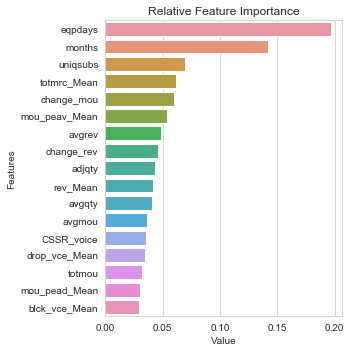

In [56]:
# Visualising feature importance as per the fine tuned RFR fitting result

# Get Feature Importance and sort
col = list(finalfeatures)
sorted(zip(XGB_RS.feature_importances_,col),reverse=True)

# import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create DataFrame
feature_imp = pd.DataFrame(sorted(zip(XGB_RS.feature_importances_,col)), columns=['Value','Features'])

# Plot
plt.figure(figsize=(5, 5))
sns.barplot(x="Value", y="Features", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Relative Feature Importance')
plt.tight_layout()
plt.show()

---
# **__ITERATION 2__**

### Exploratory Data Analyis

In [54]:
# Read data
data2 = pd.read_csv('Telecom_customer churn.csv')

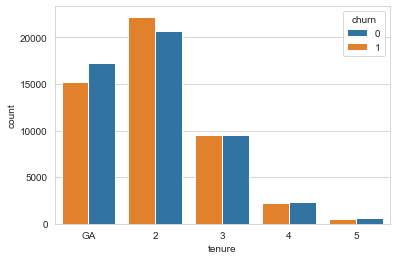

In [21]:
# Create new Variable for Exploratory Analysis Purpose
# Create new variable: Tenure
def tenure (data2):

    if (data2['months'] <= 12):
        return 'GA' #Gross Adds
    elif (data2['months'] > 12) and (data2['months'] <= 24):
        return '2'
    elif (data2['months'] > 24) and (data2['months'] <= 36):
        return '3'
    elif (data2['months'] > 36) and (data2['months'] <= 48):
        return '4'
    elif (data2['months'] > 48) and (data2['months'] <= 61):
        return '5'

data2['tenure'] = data2.apply(tenure, axis = 1)

# Count customers by Tenure
ax = sns.countplot(x="tenure", hue="churn", data=data2)
ax.invert_xaxis() 

C:\Users\anna.marie.lietar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\anna.marie.lietar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\anna.marie.lietar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\anna.marie.lietar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


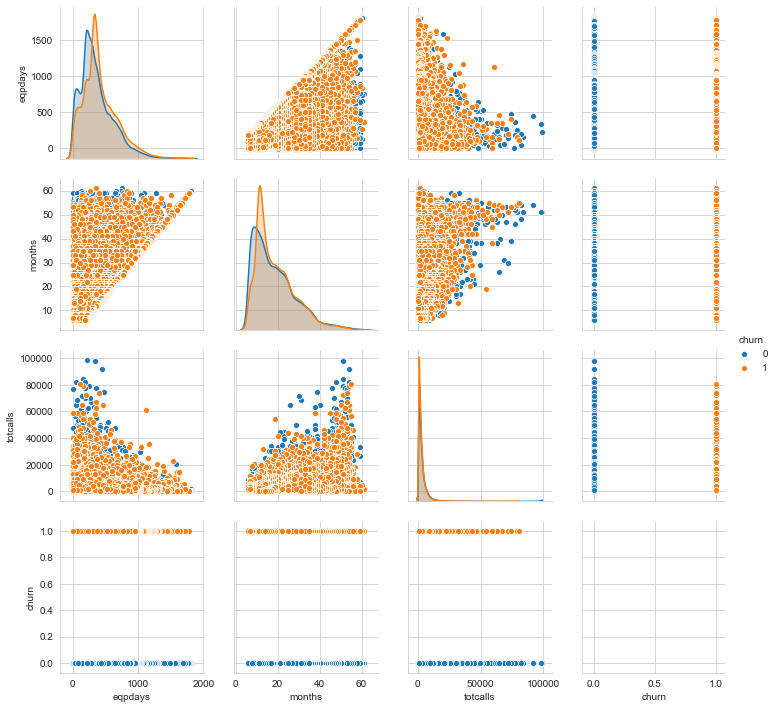

In [23]:
# Generate pairplots for selected features.
features = ['eqpdays','months', 'totcalls','churn']

sns.pairplot(data2[features], hue = 'churn')

Percentage change in monthly minutes of use vs previous three month average


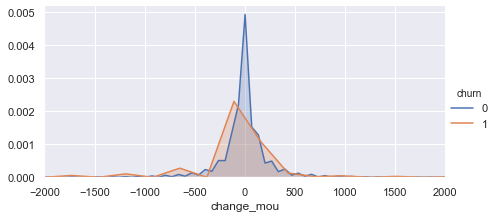

In [121]:
# Percentage change in monthly minutes of use vs previous three month average
grid = sns.FacetGrid(data2, hue='churn' ,size=3.2, aspect=2)
grid.map(sns.kdeplot, 'change_mou', shade=True)
grid.add_legend()
grid.ax.set(xlim=(-2000, 2000))

print('Percentage change in monthly minutes of use vs previous three month average')

Percentage change in monthly minutes of use vs previous three month average


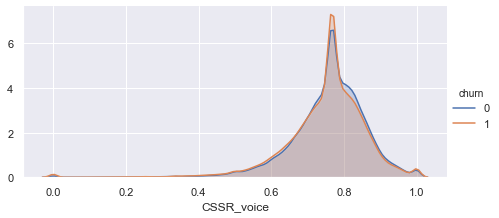

In [126]:
# Percentage change in monthly minutes of use vs previous three month average
grid = sns.FacetGrid(data2, hue='churn' ,size=3.2, aspect=2)
grid.map(sns.kdeplot, 'CSSR_voice', shade=True)
grid.add_legend()
print('Percentage change in monthly minutes of use vs previous three month average')

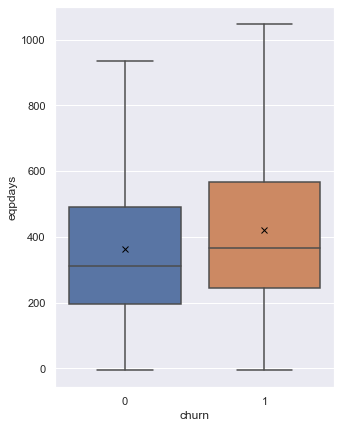

In [140]:
plt.figure(figsize=(5, 7))
sns.boxplot(y='eqpdays',x='churn',data=data2,showfliers=False,showmeans=True,
            meanprops={"marker":"x","markerfacecolor":"lightgrey", "markeredgecolor":"black"})

### Data Preparation

Steps from iteration 1 that can stay the same:

In [55]:
# Hide warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace kid0-10 columns with preteen 
preteen = data2[["kid0_2",
                "kid3_5",
                "kid6_10"]].apply(lambda x: "Y" if (x.iloc[0] == "Y" or x.iloc[1] == "Y" or x.iloc[2] == "Y") else "N",axis=1)
data2["preteen"] = preteen
data2.drop(["kid0_2","kid3_5","kid6_10"], axis=1, inplace=True)

# Replace kid11-17 columns with teen 
teen = data2[["kid11_15","kid16_17"]].apply(lambda x: "Y" if (x.iloc[0] == "Y" or x.iloc[1] == "Y") else "N",axis=1)
data2["teen"] = teen
data2.drop(["kid11_15","kid16_17"], axis=1, inplace=True)

# Create new variables
data2["CDR_data2"] = data2["drop_dat_Mean"]/data2["plcd_dat_Mean"]
data2["CSSR_data2"] = data2["comp_dat_Mean"]/data2["plcd_dat_Mean"]
data2["CSSR_voice"] = data2["comp_vce_Mean"]/data2["plcd_vce_Mean"]
data2["CSSR"] = data2["complete_Mean"]/data2["attempt_Mean"]

# Save all nominal categorical variables
categ_nominal = ['new_cell', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic','preteen','teen','creditcd']

# Save all ordinal ordered categorical variables
categ_ordinal_ordered = ['crclscod'] #Credit class code

# Let's one-hot encode all (takes about 1 minute)
for i in categ_nominal:
    data2 = pd.concat([data2,
                      pd.get_dummies(data2[i],
                                     prefix=i,
                                     dummy_na=True)],sort=False,
                     axis=1)

    
# Remove the categorical variables
data2 = data2.drop(categ_nominal,
                  axis=1)

# Order this as alphabet sort and then assign numbers instead
for i in categ_ordinal_ordered:
    s_a = sorted(data2[i].unique())
    s_a_dict = {i:x for x,i in enumerate(s_a)}
    data2[i] = data2[i].map(s_a_dict)
    
# Remove all variables based on above analyis (see excel): that have either too many missing values, or are too rare, or is not relevant (e.g. customer id)
toremove = ['new_cell_nan','asl_flag_nan','preteen_nan','teen_nan','Customer_ID','dualband_nan','refurb_new_nan','area_nan','ethnic_X','ethnic_M','dualband_U','infobase_N','hnd_webcap_UNKW','ethnic_C','dwllsize_I','dwllsize_H','dwllsize_G','dwllsize_M','dwllsize_F','ethnic_P','dwllsize_L','dwllsize_E','dwllsize_K','dwllsize_D','ethnic_D','HHstatin_H','dwllsize_N','ethnic_R','dwllsize_O','ethnic_B','dwllsize_J','dwllsize_C','marital_nan','ethnic_nan','creditcd_nan','HHstatin_G','ownrent_R','ethnic_F','area_PHILADELPHIA AREA','area_TENNESSEE AREA','ethnic_J','HHstatin_B','area_SOUTH FLORIDA AREA','ethnic_I','ethnic_O','area_CENTRAL/SOUTH TEXAS AREA','dualband_T','area_NORTHWEST/ROCKY MOUNTAIN AREA','area_HOUSTON AREA','area_NORTH FLORIDA AREA','ethnic_Z','area_OHIO AREA','area_GREAT LAKES AREA','HHstatin_A','prizm_social_one_R','CDR_data2','CSSR_data2','numbcars','lor','income','adults']

# Remove
data2 = data2.drop(toremove,axis=1)

**TEST 1:** Impute with mean instead of median

In [56]:
# Replace all other missing values with the median 
data2 = data2.fillna(value=data2.mean())

Steps from iteration 1 that can stay the same:

In [105]:
# Set target
target=['churn']

# Set X and Y (features and target)
x2 = data2[data2.columns.difference(target)]
y2 = data2[target]

# Scale
scaler = MinMaxScaler()
x2 = scaler.fit_transform(x2)

# Transform back to Dataframe with column names
x2 = pd.DataFrame(x2)
x2.columns = list(data2[data2.columns.difference(target)])

# Split data 80:20
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.20, random_state = 42)

# Overwrite our current data with selected features
finalfeatures = ['eqpdays','change_mou','months','change_rev','avgrev','avgqty','uniqsubs','avgmou','rev_Mean','adjqty','totmou','CSSR_voice','mou_peav_Mean','totmrc_Mean','drop_vce_Mean','blck_vce_Mean','mou_pead_Mean']
x2_train_final = x2_train[finalfeatures]
x2_test_final = x2_test[finalfeatures]

# Define Scoring metrics
scoring = ['roc_auc', 'accuracy','precision', 'recall']

**TEST 1 evaluation:** Run final model with mean instead of median

In [61]:
# Score
start_time = timer() #start
XGB = xgb.XGBClassifier(learning_rate=0.02, objective='binary:logistic',
                    silent=True, nthread=1, subsample =1, n_estimators = 600, min_child_weight= 10, max_depth = 5, gamma = 1, colsample_bytree =1)
Test1_scores= cross_validate(XGB, x2_train_final, y2_train.values.ravel(), cv=5, scoring=scoring)
timer(start_time) #end

# Store Results
Test1_AUC = (Test1_scores['test_roc_auc']).mean().round(3)
Test1_Acc = (Test1_scores['test_accuracy']).mean().round(3)
Test1_Prec = (Test1_scores['test_precision']).mean().round(3)
Test1_Rec = (Test1_scores['test_recall']).mean().round(3)

# took 7 minutes


 Time taken: 0 hours 6 minutes and 51.85 seconds.


In [62]:
print(Test1_AUC)
print(Test1_Acc)
print(Test1_Prec)
print(Test1_Rec)

0.668
0.619
0.61
0.636


**TEST 1 conclusion:** Running with mean doesn't not improve, results are almost the same

Comparison with benchmark (previous best fine-tuned model + previous top 17 features):
- AUC of 0.670 (imputing NAs with median) vs 0.668 (imputing NAs with mean)
- Accuracy of 0.620 (imputing NAs with median) vs 0.619 (imputing NAs with mean)
- Precision of 0.612 (imputing NAs with median) vs 0.61 (imputing NAs with mean)
- Recall of 0.638 (imputing NAs with median) vs 0.636 (imputing NAs with mean)

### Variable Selection

Let's set our benchmark model: random forest with 50 trees and top variables from iteration 1.

First, let's re-run our data prep steps:

In [106]:
# Read data
data2 = pd.read_csv('Telecom_customer churn.csv')

# Hide warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace kid0-10 columns with preteen 
preteen = data2[["kid0_2",
                "kid3_5",
                "kid6_10"]].apply(lambda x: "Y" if (x.iloc[0] == "Y" or x.iloc[1] == "Y" or x.iloc[2] == "Y") else "N",axis=1)
data2["preteen"] = preteen
data2.drop(["kid0_2","kid3_5","kid6_10"], axis=1, inplace=True)

# Replace kid11-17 columns with teen 
teen = data2[["kid11_15","kid16_17"]].apply(lambda x: "Y" if (x.iloc[0] == "Y" or x.iloc[1] == "Y") else "N",axis=1)
data2["teen"] = teen
data2.drop(["kid11_15","kid16_17"], axis=1, inplace=True)

# Create new variables
data2["CDR_data2"] = data2["drop_dat_Mean"]/data2["plcd_dat_Mean"]
data2["CSSR_data2"] = data2["comp_dat_Mean"]/data2["plcd_dat_Mean"]
data2["CSSR_voice"] = data2["comp_vce_Mean"]/data2["plcd_vce_Mean"]
data2["CSSR"] = data2["complete_Mean"]/data2["attempt_Mean"]

# Save all nominal categorical variables
categ_nominal = ['new_cell', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic','preteen','teen','creditcd']

# Save all ordinal ordered categorical variables
categ_ordinal_ordered = ['crclscod'] #Credit class code

# Let's one-hot encode all (takes about 1 minute)
for i in categ_nominal:
    data2 = pd.concat([data2,
                      pd.get_dummies(data2[i],
                                     prefix=i,
                                     dummy_na=True)],sort=False,
                     axis=1)

    
# Remove the categorical variables
data2 = data2.drop(categ_nominal,
                  axis=1)

# Order this as alphabet sort and then assign numbers instead
for i in categ_ordinal_ordered:
    s_a = sorted(data2[i].unique())
    s_a_dict = {i:x for x,i in enumerate(s_a)}
    data2[i] = data2[i].map(s_a_dict)
    
# Replace all other missing values with the median 
data2 = data2.fillna(value=data2.median())

# Set target
target=['churn']

# Set X and Y (features and target)
x2 = data2[data2.columns.difference(target)]
y2 = data2[target]

# # Scale
# scaler = MinMaxScaler()
# x2 = scaler.fit_transform(x2)

# # Transform back to Dataframe with column names
# x2 = pd.DataFrame(x2)
# x2.columns = list(data2[data2.columns.difference(target)])

# Split data 80:20
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.20, random_state = 42)

# Define Scoring metrics
scoring = ['roc_auc', 'accuracy','precision', 'recall']

Benchmark Model 

In [107]:
start_time = timer() #start

# Overwrite our current data with selected features, aka "benchmarkfeatures", aka top 17 ones from Iteration 1
benchmarkfeatures = ['eqpdays','change_mou','months','change_rev','avgrev','avgqty','uniqsubs','avgmou','rev_Mean','adjqty','totmou','CSSR_voice','mou_peav_Mean','totmrc_Mean','drop_vce_Mean','blck_vce_Mean','mou_pead_Mean']
x2_train_benchmark = x2_train[benchmarkfeatures]

# Prepare model for variable selection: Random Forest Classifier
benchmarkmodel = LogisticRegression() 

# Score
benchmarkscores= cross_validate(benchmarkmodel, x2_train_benchmark, y2_train.values.ravel(), cv=5, scoring=scoring)

# Store Results
benchmark_AUC = (benchmarkscores['test_roc_auc']).mean().round(3)
benchmark_Acc = (benchmarkscores['test_accuracy']).mean().round(3)
benchmark_Prec = (benchmarkscores['test_precision']).mean().round(3)
benchmark_Rec = (benchmarkscores['test_recall']).mean().round(3)

timer(start_time) #end


 Time taken: 0 hours 0 minutes and 20.64 seconds.


Save benchmark Results

In [108]:
# Add to outputs
models = [('Benchmark', benchmark_AUC, benchmark_Acc, benchmark_Prec, benchmark_Rec)]

result = pd.DataFrame(data = models, columns=['Model', 'AUC', 'Accuracy','Precision', 'Recall'])
result

,Model,AUC,Accuracy,Precision,Recall
0,Benchmark,0.598,0.571,0.571,0.533


Now, let's try with all variables:

In [109]:
start_time = timer() #start

# Score with "x2_train" (contains all variables)
allfeatures_scores = cross_validate(benchmarkmodel, x2_train, y2_train.values.ravel(), cv=5, scoring=scoring)

# Store Results
allfeatures_AUC = (allfeatures_scores['test_roc_auc']).mean().round(3)
allfeatures_Acc = (allfeatures_scores['test_accuracy']).mean().round(3)
allfeatures_Prec = (allfeatures_scores['test_precision']).mean().round(3)
allfeatures_Rec = (allfeatures_scores['test_recall']).mean().round(3)

timer(start_time) #end


 Time taken: 0 hours 0 minutes and 59.45 seconds.


Compare:

In [110]:
# Add to outputs
models = [('Benchmark', benchmark_AUC, benchmark_Acc, benchmark_Prec, benchmark_Rec),
         ('All Features', allfeatures_AUC, allfeatures_Acc, allfeatures_Prec, allfeatures_Rec)]

result = pd.DataFrame(data = models, columns=['Model', 'AUC', 'Accuracy','Precision', 'Recall'])
result

,Model,AUC,Accuracy,Precision,Recall
0,Benchmark,0.598,0.571,0.571,0.533
1,All Features,0.611,0.582,0.581,0.558


Interesting to see the model results are close, we might be at risk of overfitting. We can compare how the models perform with unseen data:

In [111]:
# Use final model to predict on test set
y_pred_benchmark = benchmarkmodel.fit(x2_train_benchmark, y2_train.values.ravel()).predict(x2_test[benchmarkfeatures])
y_pred_allfeatures = benchmarkmodel.fit(x2_train, y2_train.values.ravel()).predict(x2_test)

In [112]:
# Add to outputs
# Add to outputs
models = [('Benchmark; 17 features (Train)', benchmark_AUC, benchmark_Acc, benchmark_Prec, benchmark_Rec),
        ('Benchmark; 17 features (Test)', roc_auc_score(y2_test, y_pred_benchmark).round(3),
                                           accuracy_score(y2_test, y_pred_benchmark).round(3),
                                            precision_score(y2_test, y_pred_benchmark).round(3),
                                            recall_score(y2_test, y_pred_benchmark).round(3)),
         ('All 193 Features (Train)', allfeatures_AUC, allfeatures_Acc, allfeatures_Prec, allfeatures_Rec),
         ('All 193 Features (Test)', roc_auc_score(y2_test, y_pred_allfeatures).round(3),
                                           accuracy_score(y2_test, y_pred_allfeatures).round(3),
                                            precision_score(y2_test, y_pred_allfeatures).round(3),
                                            recall_score(y2_test, y_pred_allfeatures).round(3))]

result = pd.DataFrame(data = models, columns=['Model', 'AUC', 'Accuracy','Precision', 'Recall'])
result

,Model,AUC,Accuracy,Precision,Recall
0,Benchmark; 17 features (Train),0.598,0.571,0.571,0.533
1,Benchmark; 17 features (Test),0.575,0.575,0.581,0.535
2,All 193 Features (Train),0.611,0.582,0.581,0.558
3,All 193 Features (Test),0.582,0.582,0.585,0.560


In [113]:
x2_test[benchmarkfeatures]

,eqpdays,change_mou,months,change_rev,avgrev,avgqty,uniqsubs,avgmou,rev_Mean,adjqty,totmou,CSSR_voice,mou_peav_Mean,totmrc_Mean,drop_vce_Mean,blck_vce_Mean,mou_pead_Mean
75721,334.0,18.25,11,-0.5250,45.84,200.20,1,636.90,43.5650,2002,6379.0,0.807692,212.933333,44.9900,5.333333,5.000000,0.0
80184,317.0,73.25,11,-2.8125,76.95,315.22,2,1493.33,77.8025,2837,14972.0,0.625966,414.686667,84.9900,51.000000,23.666667,0.0
19864,159.0,-13.25,26,-1.8200,40.21,48.24,1,108.64,35.4500,1206,2752.0,0.517442,19.080000,29.9900,3.666667,0.333333,0.0
76699,391.0,-30.00,13,0.0000,35.58,62.50,1,141.58,34.9900,750,1713.0,0.586207,11.263333,44.9900,0.000000,0.000000,0.0
92991,292.0,-204.00,10,-32.2875,50.42,175.11,2,291.89,32.2875,1576,2689.0,0.515584,54.596667,7.9975,26.000000,15.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,462.0,2.50,19,-0.8150,73.08,204.53,2,610.94,48.3050,3477,10386.0,0.726244,203.143333,59.9900,3.000000,2.333333,0.0
29313,362.0,-26.00,25,0.2475,30.69,161.88,2,227.58,30.7425,3885,5464.0,0.946667,112.886667,30.0000,8.333333,0.000000,0.0
37862,511.0,-23.25,17,-0.2700,32.36,32.44,1,47.94,33.5100,519,789.0,0.951923,14.106667,29.9900,2.000000,0.000000,0.0
53421,340.0,-3.75,12,-0.0900,26.96,64.27,1,142.09,10.0900,707,1609.0,0.895833,30.186667,10.0000,0.333333,0.333333,0.0


In [114]:
x2_test

,CDR_data2,CSSR,CSSR_data2,CSSR_voice,Customer_ID,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,HHstatin_nan,actvsubs,adjmou,adjqty,adjrev,adults,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,area_nan,asl_flag_N,asl_flag_Y,asl_flag_nan,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,crclscod,creditcd_N,creditcd_Y,creditcd_nan,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,dualband_N,dualband_T,dualband_U,dualband_Y,dualband_nan,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_nan,dwlltype_M,dwlltype_S,dwlltype_nan,eqpdays,ethnic_B,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,ethnic_nan,forgntvl,hnd_price,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,hnd_webcap_nan,income,infobase_M,infobase_N,infobase_nan,inonemin_Mean,iwylis_vce_Mean,lor,marital_A,marital_B,marital_M,marital_S,marital_U,marital_nan,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,new_cell_N,new_cell_U,new_cell_Y,new_cell_nan,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,ownrent_O,ownrent_R,ownrent_nan,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,preteen_N,preteen_Y,preteen_nan,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_nan,recv_sms_Mean,recv_vce_Mean,refurb_new_N,refurb_new_R,refurb_new_nan,rev_Mean,roam_Mean,rv,teen_N,teen_Y,teen_nan,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
75721,0.0,0.807692,1.0,0.807692,1075722,0,0,1,0,0,0,0,1,6369.0,2002,458.39,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,173.333333,690,197,44,681.0,209.0,45.0,636.90,200.20,45.84,0.0,5.000000,0.0,0.000000,0.000000,0.000000,18.25,-0.5250,0.0,140.000000,140.000000,6,0,1,0,0.000000,0.0000,0.0,10.333333,0.0,5.333333,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,334.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,29.98999,0,1,0,0,3.0,1,0,0,14.666667,11.666667,2.0,0,0,1,0,0,0,1.0,11,695.75,0.0,346.863333,0.0,332.453333,0.0,212.933333,198.523333,41.486667,57.966667,1,0,0,0,2.0,0.0,106.000000,24.50,8.5750,1,0,0,38.333333,0.0,89.666667,1.0,0.0,173.333333,1,0,0,0,0,1,0,0,0,0.0,57.000000,1,0,0,43.5650,0.00,0.0,1,0,0,0.000000,2007,6379.0,44.9900,523.37,0.0,0.0,24.333333,1,8.5750
80184,0.0,0.625966,1.0,0.625966,1080185,0,0,0,0,0,0,1,1,13440.0,2837,692.55,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,431.333333,1815,372,79,1510.0,307.0,77.0,1493.33,315.22,76.95,0.0,23.666667,0.0,5.333333,5.816667,8.666667,73.25,-2.8125,0.0,270.000000,270.000000,3,1,0,0,5.666667,0.0000,0.0,74.666667,0.0,51.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,317.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,199.98999,0,0,1,0,6.0,1,0,0,21.000000,5.666667,5.0,0,0,0,0,1,0,1.0,11,1839.75,0.0,924.940000,0.0,650.953333,0.0,414.686667,140.703333,15.726667,40.180000,0,1,0,0,1.0,0.0,169.000000,11.25,2.8125,0,0,1,27.333333,0.0,154.333333,1.0,0.0,431.333333,1,0,0,0,0,0,0,0,1,0.0,57.000000,1,0,0,77.8025,0.00,0.0,1,0,0,0.333333,3106,14972.0,84.9900,855.52,0.0,0.0,90.333333,2,2.8125
19864,0.0,0.517442,1.0,0.517442,1019865,0,0,0

In [ ]:
# # Remove all variables based on above analyis (see excel): that have either too many missing values, or are too rare, or is not relevant (e.g. customer id)
# toremove = ['new_cell_nan','asl_flag_nan','preteen_nan','teen_nan','Customer_ID','dualband_nan','refurb_new_nan','area_nan','ethnic_X','ethnic_M','dualband_U','infobase_N','hnd_webcap_UNKW','ethnic_C','dwllsize_I','dwllsize_H','dwllsize_G','dwllsize_M','dwllsize_F','ethnic_P','dwllsize_L','dwllsize_E','dwllsize_K','dwllsize_D','ethnic_D','HHstatin_H','dwllsize_N','ethnic_R','dwllsize_O','ethnic_B','dwllsize_J','dwllsize_C','marital_nan','ethnic_nan','creditcd_nan','HHstatin_G','ownrent_R','ethnic_F','area_PHILADELPHIA AREA','area_TENNESSEE AREA','ethnic_J','HHstatin_B','area_SOUTH FLORIDA AREA','ethnic_I','ethnic_O','area_CENTRAL/SOUTH TEXAS AREA','dualband_T','area_NORTHWEST/ROCKY MOUNTAIN AREA','area_HOUSTON AREA','area_NORTH FLORIDA AREA','ethnic_Z','area_OHIO AREA','area_GREAT LAKES AREA','HHstatin_A','prizm_social_one_R','CDR_data2','CSSR_data2','numbcars','lor','income','adults']

# # Remove
# data2 = data2.drop(toremove,axis=1)

In [90]:
benchmarkmodel.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>